In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,MaxPooling2D,Flatten,Conv2D
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [11]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()
print(x_train.shape)
print(x_test.shape)


(60000, 28, 28)
(10000, 28, 28)


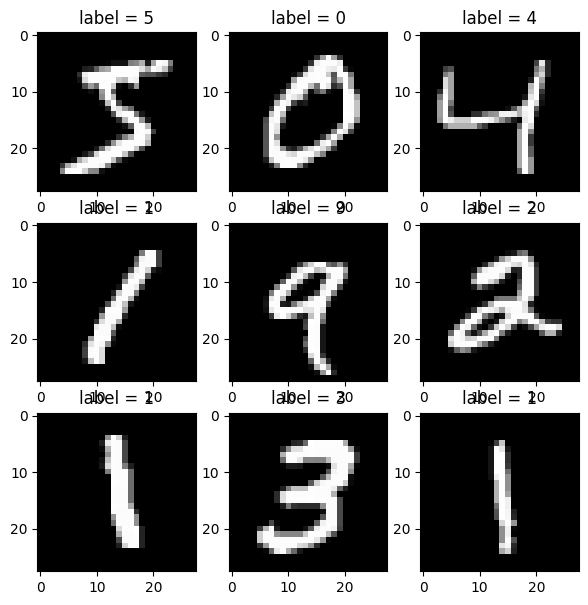

In [13]:
plt.figure(figsize=(7,7))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.title("label = "+str(y_train[i]))
    plt.imshow(x_train[i],cmap="gray")
    plt.axis()
plt.show()


In [14]:
x_train = np.reshape(x_train , (x_train.shape[0] , x_train.shape[1] , x_train.shape[2] , 1)) #reshape in 4D x_train
x_test = np.reshape(x_test , (x_test.shape[0] , x_test.shape[1] , x_test.shape[2] , 1)) # reshape in 4D x_test

x_train = x_train.astype('float32') / 255 # normalizing in range 0 to 1
x_test = x_test.astype('float32') / 255 # normalizing in range 0 to 1

y_train = to_categorical(y_train , 10) # one hot encoding of y_train
y_test = to_categorical(y_test , 10) # one hot encoding of y_test

In [15]:
model = tf.keras.Sequential() # define sequential model

model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='valid',activation="relu",input_shape=(28,28,1))) # convlution layer
model.add(MaxPooling2D(pool_size = (2,2))) # Maxpooling for down sampling
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='valid',activation="relu")) # second Convolution layer
model.add(MaxPooling2D(pool_size = (2,2))) # Maxpooling for down sampling
model.add(Flatten()) # Flatten layer for 1D transformation
model.add(Dense(units = 64 , activation = "relu")) # Fully connected layer of 64 units
model.add(Dense(units = 10 , activation = "softmax")) # output layer with 10 units as number of class = 10

In [16]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [ ]:
model.fit(x_train,y_train,batch_size = 32 , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 43s 21ms/step - loss: 0.1369 - acc: 0.9583
Epoch 2/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0461 - acc: 0.9855
Epoch 3/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0319 - acc: 0.9900
Epoch 4/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0233 - acc: 0.9925
Epoch 5/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0180 - acc: 0.9944
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0141 - acc: 0.9954
Epoch 7/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0102 - acc: 0.9968
Epoch 8/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0089 - acc: 0.9972
Epoch 9/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0089 - acc: 0.9973
Epoch 10/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0069 - acc: 0.9978


In [ ]:
history=model.evaluate(x_test,y_test,verbose=0)
acc=history[1]*100
print("%.2f"%acc,"%")

99.19 %


1/1 [==============================] - 0s 29ms/step


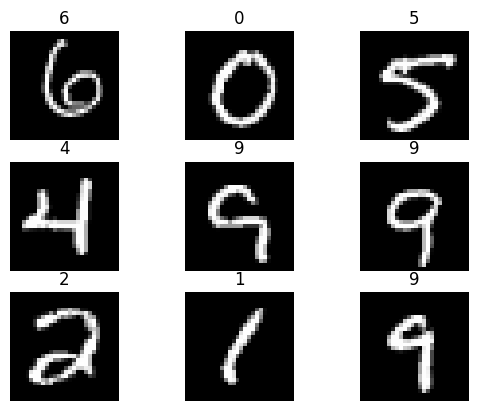

In [ ]:
test_img=x_test[100:109]
test_predictions=model.predict(test_img)
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(test_img[i],cmap="gray")
    plt.title(str(np.argmax(test_predictions[i])))
    plt.axis('off')
plt.show()